# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_Mamikos_1.csv")
df.head()

,userName,score,at,content
0,Khazul Lubis,1,2024-06-18 13:27:58,"Apk nya jelek, sudah pernah daftar tapi dibila..."
1,Bagas Jabbar Isnain,4,2024-06-16 12:04:40,"halo min, terima kasih telah menambahkan fitur..."
2,Muhamad Nur,5,2024-06-16 06:36:10,Tadinya sempat ada hambatan dalam mengajukan s...
3,tyas aprillia praweswary,5,2024-06-15 15:21:42,mantab
4,pier magarnegara,1,2024-06-15 06:02:08,Di info harga


In [3]:
# Menampilkan Column Content, Username, dan at.

df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,"Apk nya jelek, sudah pernah daftar tapi dibila...",Khazul Lubis,2024-06-18 13:27:58
1,"halo min, terima kasih telah menambahkan fitur...",Bagas Jabbar Isnain,2024-06-16 12:04:40
2,Tadinya sempat ada hambatan dalam mengajukan s...,Muhamad Nur,2024-06-16 06:36:10
3,mantab,tyas aprillia praweswary,2024-06-15 15:21:42
4,Di info harga,pier magarnegara,2024-06-15 06:02:08
...,...,...,...
1495,Membantu banget apalagi buat saya yang kerjaan...,Wahyu Aji Saputro,2022-06-19 07:01:37
1496,"Gilaa kerenn banget, saya sebagai mahasiswa ma...",18_Makrozenia Juniar Citra,2022-06-19 04:41:04
1497,dengan aplikasi ini gampang banget klo mau car...,Shintya Damayanti,2022-06-19 04:18:39
1498,Awal kerja di jakarta nyari kost lewat mamikos...,iyus rustandi,2022-06-19 04:01:37


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   1500 non-null   object
 1   userName  1500 non-null   object
 2   at        1500 non-null   object
dtypes: object(3)
memory usage: 35.3+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.

df.describe()

,content,userName,at
count,1500,1500,1500
unique,1450,1496,1499
top,Ok,Cimindi Bawah,2022-12-20 20:37:15
freq,10,2,2


# **Pre - Processing**


1.   Cleaning Data
2.   Case Folding
3.   Normalization
4.   Stopword
5.   Tokenize
6.   Stemming
7.   Translate
8.   Labeling

# **Cleaning Data & Case Folding**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.

df.shape

(1500, 3)

In [7]:
# Menghapus data yang duplicate

df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat

df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong

df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.

df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
# Mengetahui jumlah berapa baris dan kolom setelahnya

df.shape

(1450, 3)

In [12]:
# Fungsi Cleaning Text

def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [13]:
# Fungsi Hapus Emoji

def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan Fungsi Cleaning Text, Emoji, dan Case Folding yang sudah dibuat kedalam column 'content'

df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,apk nya jelek sudah pernah daftar tapi dibilan...,Khazul Lubis,2024-06-18 13:27:58
1,halo min terima kasih telah menambahkan fitur ...,Bagas Jabbar Isnain,2024-06-16 12:04:40
2,tadinya sempat ada hambatan dalam mengajukan s...,Muhamad Nur,2024-06-16 06:36:10
3,mantab,tyas aprillia praweswary,2024-06-15 15:21:42
4,di info harga,pier magarnegara,2024-06-15 06:02:08
...,...,...,...
1495,membantu banget apalagi buat saya yang kerjaan...,Wahyu Aji Saputro,2022-06-19 07:01:37
1496,gilaa kerenn banget saya sebagai mahasiswa mak...,18_Makrozenia Juniar Citra,2022-06-19 04:41:04
1497,dengan aplikasi ini gampang banget klo mau car...,Shintya Damayanti,2022-06-19 04:18:39
1498,awal kerja di jakarta nyari kost lewat mamikos...,iyus rustandi,2022-06-19 04:01:37


# **Normalization**

In [15]:
# Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "ngk" : "ngga",
        "mobeli" : "mobile"
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,aplikasi nya jelek sudah pernah daftar tapi di...,Khazul Lubis,2024-06-18 13:27:58
1,halo min terima kasih telah menambahkan fitur ...,Bagas Jabbar Isnain,2024-06-16 12:04:40
2,tadinya sempat ada hambatan dalam mengajukan s...,Muhamad Nur,2024-06-16 06:36:10
3,mantab,tyas aprillia praweswary,2024-06-15 15:21:42
4,di info harga,pier magarnegara,2024-06-15 06:02:08
...,...,...,...
1495,membantu banget apalagi buat saya yang kerjaan...,Wahyu Aji Saputro,2022-06-19 07:01:37
1496,gilaa kerenn banget saya sebagai mahasiswa mak...,18_Makrozenia Juniar Citra,2022-06-19 04:41:04
1497,dengan aplikasi ini gampang banget kalau mau c...,Shintya Damayanti,2022-06-19 04:18:39
1498,awal kerja di jakarta nyari kost lewat mamikos...,iyus rustandi,2022-06-19 04:01:37


# **Stopwords**

In [16]:
# Menginstall Library Sastrawi

!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.7 MB/s eta 0:00:00


In [17]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,aplikasi nya jelek pernah daftar dibilang pern...,Khazul Lubis,2024-06-18 13:27:58
1,halo min terima kasih menambahkan fitur mamiko...,Bagas Jabbar Isnain,2024-06-16 12:04:40
2,tadinya sempat hambatan mengajukan sewa dipand...,Muhamad Nur,2024-06-16 06:36:10
3,mantab,tyas aprillia praweswary,2024-06-15 15:21:42
4,info harga,pier magarnegara,2024-06-15 06:02:08
...,...,...,...
1495,membantu banget buat kerjaan pindah pindah tem...,Wahyu Aji Saputro,2022-06-19 07:01:37
1496,gilaa kerenn banget sebagai mahasiswa makin mu...,18_Makrozenia Juniar Citra,2022-06-19 04:41:04
1497,aplikasi gampang banget kalau mau cari kost se...,Shintya Damayanti,2022-06-19 04:18:39
1498,awal kerja jakarta nyari kost lewat mamikos sa...,iyus rustandi,2022-06-19 04:01:37


# **Tokenize**

In [18]:
# Tokenize

tokenized = df['content'].apply(lambda x:x.split())
tokenized

0       [aplikasi, nya, jelek, pernah, daftar, dibilan...
1       [halo, min, terima, kasih, menambahkan, fitur,...
2       [tadinya, sempat, hambatan, mengajukan, sewa, ...
3                                                [mantab]
4                                           [info, harga]
                              ...                        
1495    [membantu, banget, buat, kerjaan, pindah, pind...
1496    [gilaa, kerenn, banget, sebagai, mahasiswa, ma...
1497    [aplikasi, gampang, banget, kalau, mau, cari, ...
1498    [awal, kerja, jakarta, nyari, kost, lewat, mam...
1499    [terimakasih, mamikos, sangat, membantu, anak,...
Name: content, Length: 1450, dtype: object

# **Stemming**

In [19]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# tokenized = tokenized.apply(stemming)

# tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Mamikos_1.csv', index = False)


In [20]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Mamikos_1.csv', encoding = 'latin1')
df_clean

,content
0,aplikasi nya jelek pernah daftar bilang pernah...
1,halo min terima kasih tambah fitur mamikos ing...
2,tadi sempat hambat aju sewa pandu cs nya bisa ...
3,mantab
4,info harga
...,...
1445,bantu banget buat kerja pindah pindah tempat m...
1446,gilaa kerenn banget bagai mahasiswa makin mudh...
1447,aplikasi gampang banget kalau mau cari kost se...
1448,awal kerja jakarta nyari kost lewat mamikos sa...


# **Translate**

In [21]:
# Menginstall Library easynmt

!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3

In [22]:
import pandas as pd
from easynmt import EasyNMT

In [23]:
# Load Data Hasil Stemming

df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Mamikos_1.csv', encoding='latin1')

In [24]:
# Menentukan Asal & Target Bahasa yang akan diterjemahkan

source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [25]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 5.03MB/s]                   


In [26]:
# Imputing NaN Values

df2 = df_clean.fillna(method = 'pad')
df2

,content
0,aplikasi nya jelek pernah daftar bilang pernah...
1,halo min terima kasih tambah fitur mamikos ing...
2,tadi sempat hambat aju sewa pandu cs nya bisa ...
3,mantab
4,info harga
...,...
1445,bantu banget buat kerja pindah pindah tempat m...
1446,gilaa kerenn banget bagai mahasiswa makin mudh...
1447,aplikasi gampang banget kalau mau cari kost se...
1448,awal kerja jakarta nyari kost lewat mamikos sa...


In [27]:
# # Mengaplikasikan Fungsi Translate yang sudah dibuat kedalam column 'content'

# df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Mamikos_1.csv')

In [28]:
# Load Dataset Hasil Translate

df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Mamikos_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,aplikasi nya jelek pernah daftar bilang pernah...,The application was bad. The list said the lis...
1,1,halo min terima kasih tambah fitur mamikos ing...,Hello. Thank you. Add a mamikos feature.
2,2,tadi sempat hambat aju sewa pandu cs nya bisa ...,"fontcolor="" # FFFF00""for a while iamor fontcol..."
3,3,mantab,That's great.
4,4,info harga,Price info
...,...,...,...
1445,1445,bantu banget buat kerja pindah pindah tempat m...,It's really helpful for you to move to a place...
1446,1446,gilaa kerenn banget bagai mahasiswa makin mudh...,It's so cool to look like a student. It's gett...
1447,1447,aplikasi gampang banget kalau mau cari kost se...,It's very easy to get a budget as a budget.
1448,1448,awal kerja jakarta nyari kost lewat mamikos sa...,"fontcolor="" # FFFF00""bekartaworkstartedthecost..."


# **Labeling**

In [29]:
# Load Dataset Hasil Translate

df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Mamikos_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,aplikasi nya jelek pernah daftar bilang pernah...,The application was bad. The list said the lis...
1,1,halo min terima kasih tambah fitur mamikos ing...,Hello. Thank you. Add a mamikos feature.
2,2,tadi sempat hambat aju sewa pandu cs nya bisa ...,"fontcolor="" # FFFF00""for a while iamor fontcol..."
3,3,mantab,That's great.
4,4,info harga,Price info
...,...,...,...
1445,1445,bantu banget buat kerja pindah pindah tempat m...,It's really helpful for you to move to a place...
1446,1446,gilaa kerenn banget bagai mahasiswa makin mudh...,It's so cool to look like a student. It's gett...
1447,1447,aplikasi gampang banget kalau mau cari kost se...,It's very easy to get a budget as a budget.
1448,1448,awal kerja jakarta nyari kost lewat mamikos sa...,"fontcolor="" # FFFF00""bekartaworkstartedthecost..."


In [30]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK

!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [31]:
# Import Library yang dibutuhkan

import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
# Labeling With TextBlob

data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 840
Netral = 389
Negatif = 221

Total Data Seluruhnya : 1450


In [33]:
# Melihat Status Sentimen

df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,aplikasi nya jelek pernah daftar bilang pernah...,The application was bad. The list said the lis...,Negatif
1,1,halo min terima kasih tambah fitur mamikos ing...,Hello. Thank you. Add a mamikos feature.,Netral
2,2,tadi sempat hambat aju sewa pandu cs nya bisa ...,"fontcolor="" # FFFF00""for a while iamor fontcol...",Netral
3,3,mantab,That's great.,Positif
4,4,info harga,Price info,Netral
...,...,...,...,...
1445,1445,bantu banget buat kerja pindah pindah tempat m...,It's really helpful for you to move to a place...,Positif
1446,1446,gilaa kerenn banget bagai mahasiswa makin mudh...,It's so cool to look like a student. It's gett...,Positif
1447,1447,aplikasi gampang banget kalau mau cari kost se...,It's very easy to get a budget as a budget.,Positif
1448,1448,awal kerja jakarta nyari kost lewat mamikos sa...,"fontcolor="" # FFFF00""bekartaworkstartedthecost...",Netral


In [34]:
# Menghapus Colum Unnamed: 0

data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,aplikasi nya jelek pernah daftar bilang pernah...,The application was bad. The list said the lis...,Negatif
1,halo min terima kasih tambah fitur mamikos ing...,Hello. Thank you. Add a mamikos feature.,Netral
2,tadi sempat hambat aju sewa pandu cs nya bisa ...,"fontcolor="" # FFFF00""for a while iamor fontcol...",Netral
3,mantab,That's great.,Positif
4,info harga,Price info,Netral
...,...,...,...
1445,bantu banget buat kerja pindah pindah tempat m...,It's really helpful for you to move to a place...,Positif
1446,gilaa kerenn banget bagai mahasiswa makin mudh...,It's so cool to look like a student. It's gett...,Positif
1447,aplikasi gampang banget kalau mau cari kost se...,It's very easy to get a budget as a budget.,Positif
1448,awal kerja jakarta nyari kost lewat mamikos sa...,"fontcolor="" # FFFF00""bekartaworkstartedthecost...",Netral


# **Visualization**


1.   Bar Plot
2.   Pie Chart
3.   Wordcloud



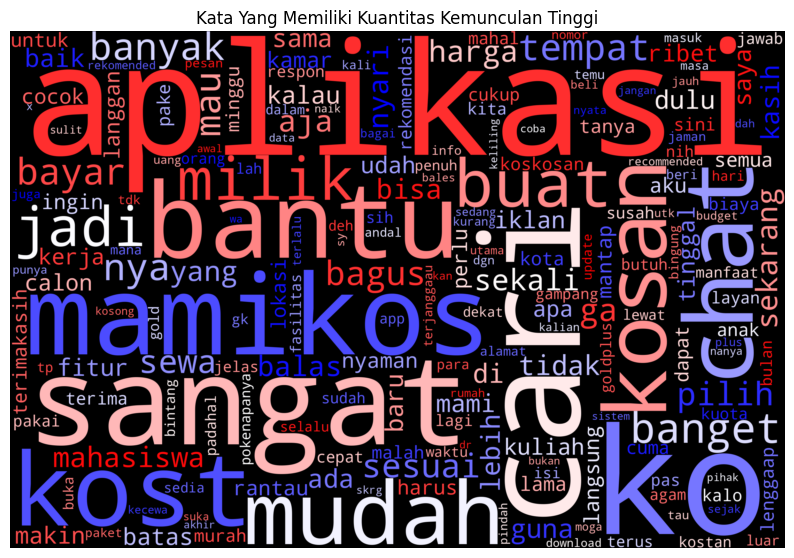

In [35]:
# Visualisasi Kata Yang Memiliki Kuantitas Kemunculan Paling Tinggi

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Kemunculan Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


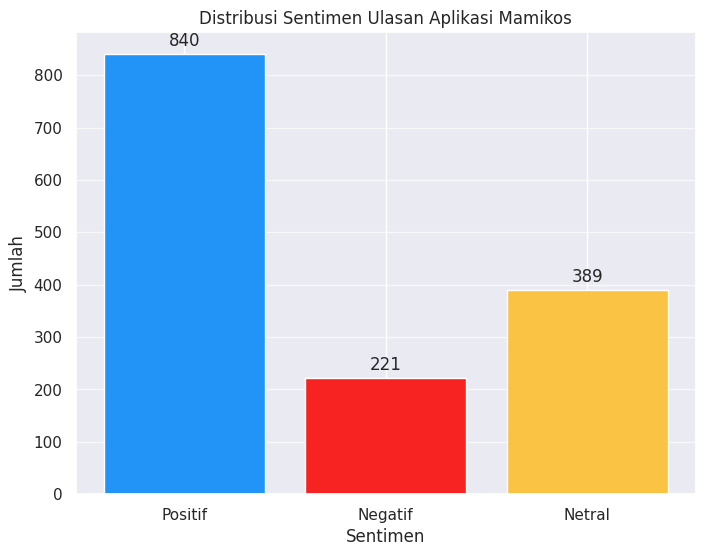

In [36]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Mamikos")


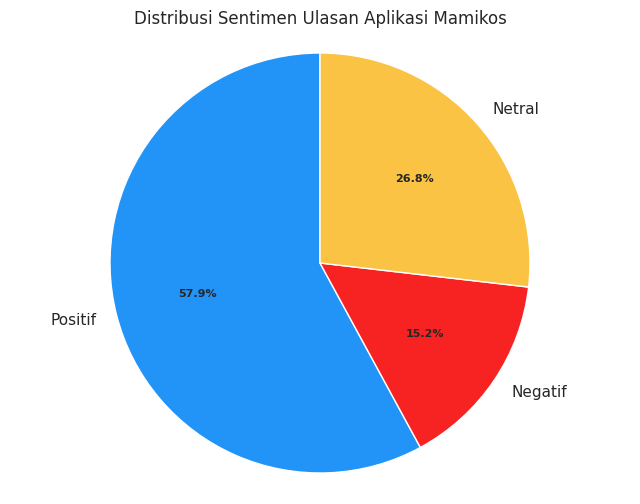

In [37]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Mamikos")

In [38]:
# Menghapus Sentimen Netral

data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,aplikasi nya jelek pernah daftar bilang pernah...,The application was bad. The list said the lis...,Negatif
3,mantab,That's great.,Positif
5,cara daftar nya terlalu dipersulittidak sat se...,"fontcolor="" # FFFF00""waythelististoo difficult...",Negatif
6,coba dulu,Try it first.,Positif
7,aplikasi nya bagus buat rantau,It's a good app. For fuck's sake.,Positif
...,...,...,...
1444,aplikasi sangat rekomendasi cari kos utama par...,The application highly recommends finding the ...,Positif
1445,bantu banget buat kerja pindah pindah tempat m...,It's really helpful for you to move to a place...,Positif
1446,gilaa kerenn banget bagai mahasiswa makin mudh...,It's so cool to look like a student. It's gett...,Positif
1447,aplikasi gampang banget kalau mau cari kost se...,It's very easy to get a budget as a budget.,Positif


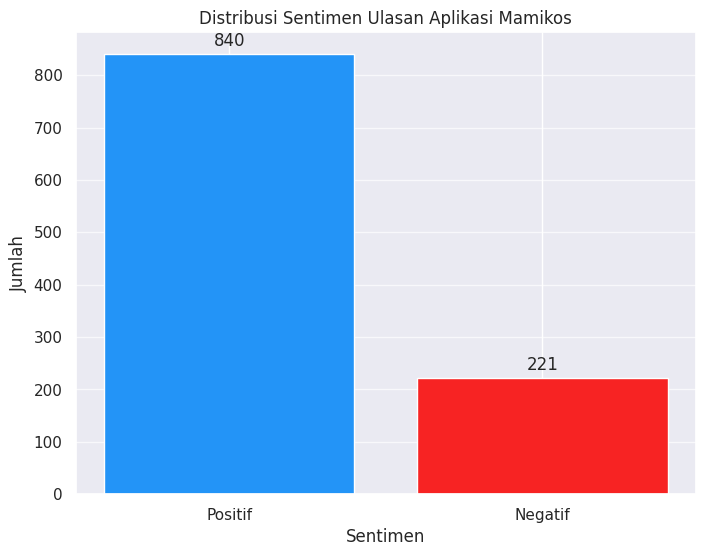

In [39]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Mamikos")


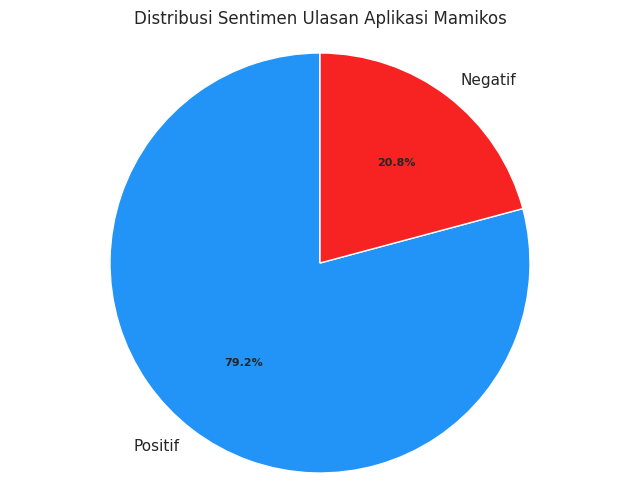

In [40]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Mamikos")

In [41]:
# Replace Data Sentimen

data = data.replace({'Positif':0, 'Negatif':1})
data

,content,content_en,sentimen
0,aplikasi nya jelek pernah daftar bilang pernah...,The application was bad. The list said the lis...,1
3,mantab,That's great.,0
5,cara daftar nya terlalu dipersulittidak sat se...,"fontcolor="" # FFFF00""waythelististoo difficult...",1
6,coba dulu,Try it first.,0
7,aplikasi nya bagus buat rantau,It's a good app. For fuck's sake.,0
...,...,...,...
1444,aplikasi sangat rekomendasi cari kos utama par...,The application highly recommends finding the ...,0
1445,bantu banget buat kerja pindah pindah tempat m...,It's really helpful for you to move to a place...,0
1446,gilaa kerenn banget bagai mahasiswa makin mudh...,It's so cool to look like a student. It's gett...,0
1447,aplikasi gampang banget kalau mau cari kost se...,It's very easy to get a budget as a budget.,0


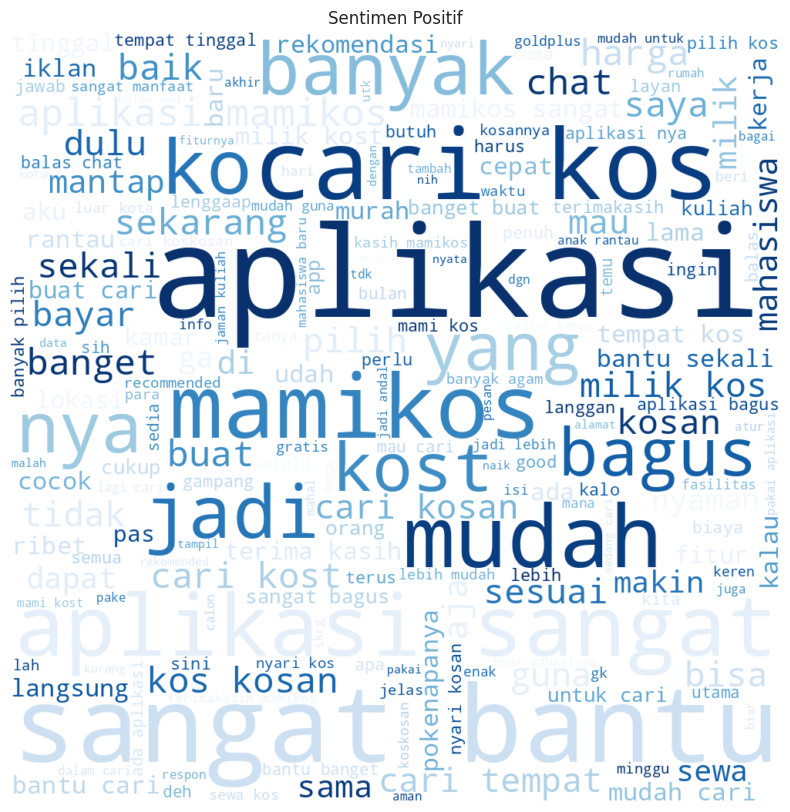

In [42]:
# Visualisasi Wordcould Positif & Negatif

data_positif = data[data['sentimen'] == 0]
data_negatif = data[data['sentimen'] == 1]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

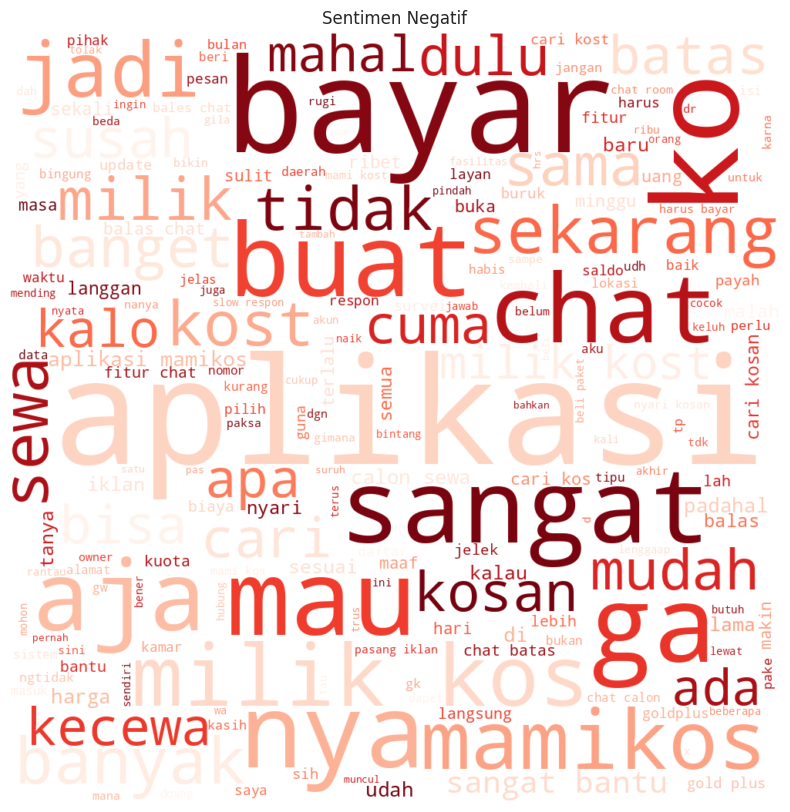

In [43]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

In [44]:
# Menghitung Jumlah Sentimen Positif, Negatif

data['sentimen'].value_counts()

sentimen
0    840
1    221
Name: count, dtype: int64

# **Transormation & Data Preparation**

In [45]:
# Import Library yang dibutuhkan

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [46]:
# Memisahkan data menjadi data latih dan data uji [ Splitting Data ]

X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [47]:
# Menggunakan TF - IDF Vectorizer untuk mengubah teks menjadi fitur numerik [ Text Vectorizer ]

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [48]:
# Melakukan oversampling menggunakan Random Over-Sampling pada data latih

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_vec, y_train)

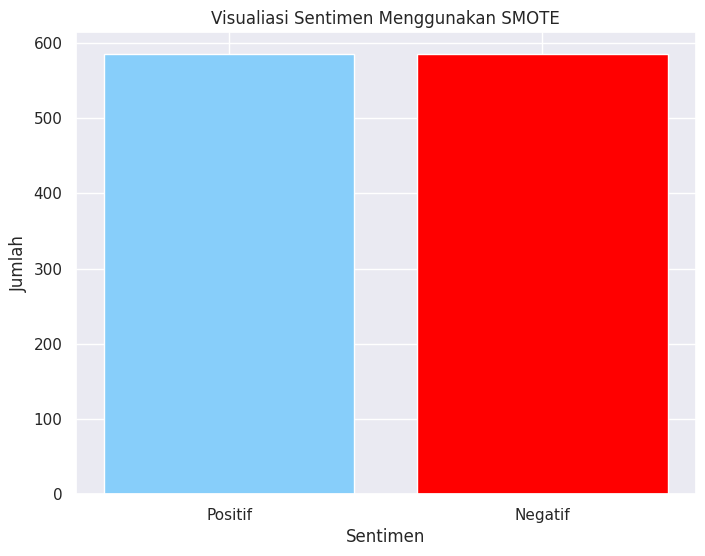

In [49]:
# Visualiasi data hasil resampling menggunakan SMOTE

sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['lightskyblue', 'red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Positif', 'Negatif'])
plt.show()

# **Data Mining**

In [50]:
# Import Library Warning
import warnings
warnings.filterwarnings('ignore')

In [51]:
# Membangun Model Naive Bayes Classifier

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [52]:
y_pred = naive_bayes.predict(X_test_vec)

# **Interpretation / Evaluation**


1.   Classification Report
2.   Confusion Matrix
3.   Classification Accuracy
4.   Classification Error




In [53]:
# Classification Report

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Positif', 'Negatif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.7962382445141066

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Positif       0.93      0.81      0.86       255
     Negatif       0.49      0.75      0.60        64

    accuracy                           0.80       319
   macro avg       0.71      0.78      0.73       319
weighted avg       0.84      0.80      0.81       319



In [54]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])

print('\nTrue Negatives (TN) = ', cm[1, 1])

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])



print('\nAccuracy = ', accuracy)

Confusion matrix

 [[206  49]
 [ 16  48]]

True Positives (TP) =  206

True Negatives (TN) =  48

False Positives (FP) =  49

False Negatives (FN) =  16

Accuracy =  0.7962382445141066


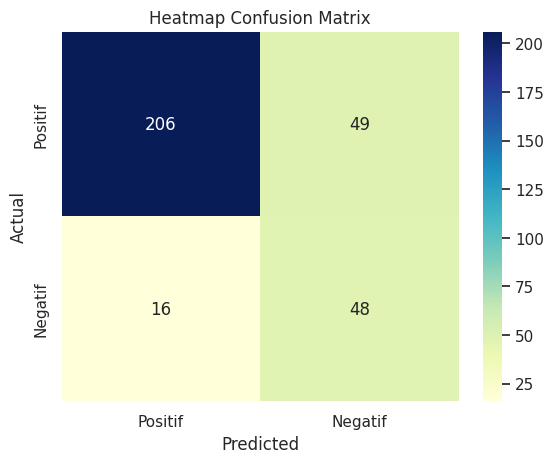

In [55]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Positif','Negatif'],
                         index=['Positif','Negatif'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [56]:
# Slicing Confusion Matrix

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


In [57]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7962


In [58]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2038


# **Testing**

In [63]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Maaf ya, saya jadi kurang nyaman dengan versi terbarunya. Bukannya pengguna lain juga memiliki keluhan yg sama tapi tak kunjung diperbaiki? Menyedihkan sekali
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 70.54%
Probabilitas: 70.53534569913744 %


In [60]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : amanah banget aku suka aplikasi nya cari apartemen dan kos jadi gampang
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 92.35%
Probabilitas: 92.3481978025599 %
